In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install citipy
# Add Citipy module
from citipy import citipy

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitude and longitude to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm suffienct count.
len(cities)

611

In [11]:
# Import the time library and the datetime module from the datetime library. 
import time
from datetime import datetime

In [12]:
# Import the request library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | balkanabat
Processing Record 2 of set 1 | kattivakkam
Processing Record 3 of set 1 | angoche
Processing Record 4 of set 1 | kirakira
Processing Record 5 of set 1 | japura
Processing Record 6 of set 1 | hithadhoo
Processing Record 7 of set 1 | saskylakh
Processing Record 8 of set 1 | norman wells
Processing Record 9 of set 1 | busselton
Processing Record 10 of set 1 | umm lajj
Processing Record 11 of set 1 | ribeira grande
Processing Record 12 of set 1 | goudomp
City not found. Skipping...
Processing Record 13 of set 1 | grand gaube
Processing Record 14 of set 1 | kavaratti
Processing Record 15 of set 1 | hobart
Processing Record 16 of set 1 | katsuura
Processing Record 17 of set 1 | inderborskiy
City not found. Skipping...
Processing Record 18 of set 1 | cidreira
Processing Record 19 of set 1 | qaanaaq
Processing Record 20 of set 1 | carnarvon
Processing Record 21 of set 1 | tashla
Processing Rec

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)

In [15]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Balkanabat,39.5108,54.3671,44.11,43,0,6.33,TM,2022-01-24 20:46:36
1,Kattivakkam,13.2167,80.3167,77.07,88,53,8.08,IN,2022-01-24 20:46:36
2,Angoche,-16.2325,39.9086,78.28,77,100,18.34,MZ,2022-01-24 20:46:37
3,Kirakira,-10.4544,161.9205,82.47,83,100,5.17,SB,2022-01-24 20:46:37
4,Japura,-0.3167,102.3500,73.53,98,95,2.19,ID,2022-01-24 20:46:38
5,Hithadhoo,-0.6000,73.0833,81.05,77,82,13.13,MV,2022-01-24 20:46:38
6,Saskylakh,71.9167,114.0833,-8.12,96,100,6.29,RU,2022-01-24 20:46:39
7,Norman Wells,65.2820,-126.8329,10.44,85,75,11.50,CA,2022-01-24 20:46:39
8,Busselton,-33.6500,115.3333,60.08,80,45,10.96,AU,2022-01-24 20:46:40
9,Umm Lajj,25.0213,37.2685,63.77,59,2,13.00,SA,2022-01-24 20:46:40


In [16]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balkanabat,TM,2022-01-24 20:46:36,39.5108,54.3671,44.11,43,0,6.33
1,Kattivakkam,IN,2022-01-24 20:46:36,13.2167,80.3167,77.07,88,53,8.08
2,Angoche,MZ,2022-01-24 20:46:37,-16.2325,39.9086,78.28,77,100,18.34
3,Kirakira,SB,2022-01-24 20:46:37,-10.4544,161.9205,82.47,83,100,5.17
4,Japura,ID,2022-01-24 20:46:38,-0.3167,102.3500,73.53,98,95,2.19
5,Hithadhoo,MV,2022-01-24 20:46:38,-0.6000,73.0833,81.05,77,82,13.13
6,Saskylakh,RU,2022-01-24 20:46:39,71.9167,114.0833,-8.12,96,100,6.29
7,Norman Wells,CA,2022-01-24 20:46:39,65.2820,-126.8329,10.44,85,75,11.50
8,Busselton,AU,2022-01-24 20:46:40,-33.6500,115.3333,60.08,80,45,10.96
9,Umm Lajj,SA,2022-01-24 20:46:40,25.0213,37.2685,63.77,59,2,13.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

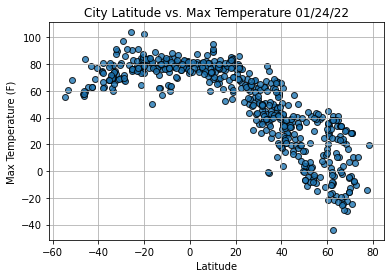

In [21]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

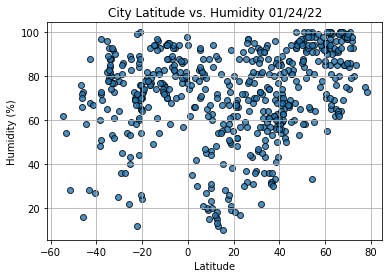

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

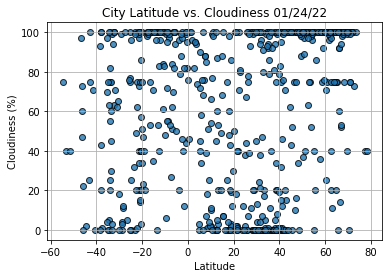

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

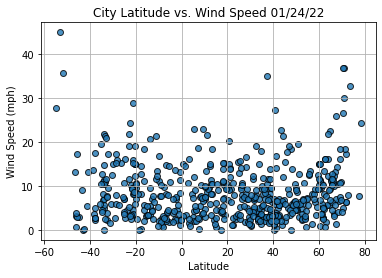

In [24]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Locate index 13 in city_data_df
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-01-24 20:46:42
Lat                      -42.8794
Lng                      147.3294
Max Temp                    63.05
Humidity                       88
Cloudiness                     75
Wind Speed                    0.0
Name: 13, dtype: object

In [26]:
# Filter city_data_df for all Northern Hemisphere latitudes.
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
551     True
552     True
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [27]:
# Return DataFrame with filterd criteria.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balkanabat,TM,2022-01-24 20:46:36,39.5108,54.3671,44.11,43,0,6.33
1,Kattivakkam,IN,2022-01-24 20:46:36,13.2167,80.3167,77.07,88,53,8.08
6,Saskylakh,RU,2022-01-24 20:46:39,71.9167,114.0833,-8.12,96,100,6.29
7,Norman Wells,CA,2022-01-24 20:46:39,65.2820,-126.8329,10.44,85,75,11.50
9,Umm Lajj,SA,2022-01-24 20:46:40,25.0213,37.2685,63.77,59,2,13.00


In [28]:
city_data_df["Lat"] < 0

0      False
1      False
2       True
3       True
4       True
       ...  
551    False
552    False
553    False
554    False
555    False
Name: Lat, Length: 556, dtype: bool

In [29]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)].head()
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Angoche,MZ,2022-01-24 20:46:37,-16.2325,39.9086,78.28,77,100,18.34
3,Kirakira,SB,2022-01-24 20:46:37,-10.4544,161.9205,82.47,83,100,5.17
4,Japura,ID,2022-01-24 20:46:38,-0.3167,102.3500,73.53,98,95,2.19
5,Hithadhoo,MV,2022-01-24 20:46:38,-0.6000,73.0833,81.05,77,82,13.13
8,Busselton,AU,2022-01-24 20:46:40,-33.6500,115.3333,60.08,80,45,10.96


In [30]:
# Linear regression ont the Northern Hemishpere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemishpere \
                       for Maximum Temperature', 'Max Temp', (10,40))

NameError: name 'plot_linear_regression' is not defined